# Linear Regression By Gradient Descent

### Importing Libraries

In [430]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [431]:
os.getcwd()
%ls

 Volume in drive C is OS
 Volume Serial Number is 7CC1-D156

 Directory of C:\Users\Asus\Documents\DSc_Assignment\Assignment_3.1

01/31/2022  03:50 PM    <DIR>          .
01/31/2022  10:09 AM    <DIR>          ..
01/31/2022  03:44 PM    <DIR>          .ipynb_checkpoints
01/31/2022  12:00 PM            65,210 Assignment_3.1_1.ipynb
01/31/2022  03:50 PM            89,771 Assignment_3.1_2.ipynb
01/31/2022  11:53 AM            49,082 housing.csv
01/31/2022  10:13 AM               454 Salary_Data.csv
               4 File(s)        204,517 bytes
               3 Dir(s)  41,249,308,672 bytes free


### Importing dataset

In [432]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,7.02259,0.0,18.10,0,0.718,6.006,95.3,1.8746,24,666.0,20.2,319.98,15.70,14.2
1,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13,19.1
2,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04,21.2
3,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,7.0
4,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
5,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304.0,18.4,350.45,12.64,16.1
6,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345.0,18.9,396.21,8.10,22.0
7,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666.0,20.2,396.90,21.24,13.3
8,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
9,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222.0,18.4,396.90,7.53,28.2


In [433]:
x = dataset.loc[:,column_names[:-1]]
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,7.02259,0.0,18.10,0,0.718,6.006,95.3,1.8746,24,666.0,20.2,319.98,15.70
1,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
2,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
3,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98
4,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.13914,0.0,4.05,0,0.510,5.572,88.5,2.5961,5,296.0,16.6,396.90,14.69
502,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233.0,17.9,396.90,30.81
503,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329.0,12.6,392.20,6.62
504,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53


### Scaling with 0 mean and 1 standard deviation

In [434]:
for i in column_names[:-1]:
    x[i] = (x[i]-x[i].mean())/x[i].std()
x 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.396332,-0.487240,1.014995,-0.272329,1.409287,-0.396566,0.949420,-0.912017,1.659603,1.529413,0.805778,-0.401929,0.426678
1,1.390701,-0.487240,1.014995,-0.272329,0.218376,-0.510426,0.086153,-0.421066,1.659603,1.529413,0.805778,0.132165,0.766964
2,-0.404804,-0.487240,-0.164245,-0.272329,-0.066407,-0.154614,0.139441,-0.505740,-0.407638,0.140995,-0.302794,0.401183,-0.085850
3,4.898257,-0.487240,1.014995,-0.272329,1.193543,-2.512940,1.116390,-1.014785,1.659603,1.529413,0.805778,-2.939969,3.406628
4,0.653229,-0.487240,1.014995,-0.272329,0.658496,-0.097684,1.116390,-1.247058,1.659603,1.529413,0.805778,0.103795,-0.437339
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.403926,-0.487240,-1.033005,-0.272329,-0.385709,-1.014257,0.707847,-0.569377,-0.522484,-0.665949,-0.857081,0.440616,0.285243
502,-0.390587,-0.487240,-0.616117,-0.272329,-0.920756,-1.260479,0.949420,0.985396,-0.752178,-1.039754,-0.256604,0.440616,2.542610
503,-0.415721,2.942931,-1.401791,-0.272329,-1.300467,1.408115,-1.075528,1.668775,-0.867024,-0.470147,-2.704703,0.389134,-0.844841
504,-0.413540,1.227845,-0.688999,3.664771,-0.929386,0.673718,-1.267366,0.134186,-0.637331,-0.915152,-0.395176,0.440616,-1.277550


In [435]:
y = dataset.loc[:,column_names[-1]]
y_mean = y.mean() #for rescaling later
y_std = y.std() #for rescaling later
y = (y-y_mean)/y_std
y

0     -0.906025
1     -0.373249
2     -0.144916
3     -1.688880
4      2.986505
         ...   
501    0.061671
502   -0.884279
503    1.312064
504    1.072859
505    0.083417
Name: MEDV, Length: 506, dtype: float64

### Separate Dataset in 80-20 split

In [436]:
mark = int(0.8*len(x))
mark

404

In [437]:
train_x = x.head(mark).to_numpy()
train_y = y.head(mark).to_numpy()
print(train_x)
print(train_y)

# a = train_y@train_x
# a.shape

[[ 0.39633187 -0.48724019  1.01499462 ...  0.80577843 -0.40192876
   0.42667841]
 [ 1.39070089 -0.48724019  1.01499462 ...  0.80577843  0.13216481
   0.76696395]
 [-0.40480443 -0.48724019 -0.164245   ... -0.3027945   0.40118323
  -0.08585044]
 ...
 [-0.40387204 -0.48724019 -0.37560439 ...  1.1291122   0.39450158
  -0.04524023]
 [ 0.08548074 -0.48724019  1.01499462 ...  0.80577843  0.44061589
   0.50929918]
 [-0.41393767 -0.48724019 -1.12629463 ... -0.3027945   0.43141494
  -0.97367362]]
[-0.90602501 -0.37324861 -0.14491587 -1.68888013  2.9865046  -0.69943824
 -0.05793197 -1.0038819   2.04055467  0.61619327 -1.16697672 -0.79729513
  2.23626845 -0.53634343  1.39904839  0.26825767 -1.07999281 -0.32975666
  0.10516285 -0.50372446 -0.34062965  0.45309846 -0.89515202 -0.34062965
 -0.22102678 -0.09055093  0.84452602  0.20301974 -0.35150264 -1.5366583
 -0.03618599  0.07254389  0.17040078 -0.2971377  -0.51459745  2.9865046
  2.9865046   1.67087308 -0.19928081 -0.06880495 -0.40586757 -1.03650086

In [438]:
test_x = x.tail(len(x)-mark).to_numpy()
test_y = y.tail(len(y)-mark).to_numpy()
print(test_x)
print(test_y)

[[-0.41843686  3.80047346 -1.43094368 ... -1.54993904  0.39680182
  -1.21873523]
 [ 0.92592393 -0.48724019  1.01499462 ...  0.80577843  0.44061589
   1.82422974]
 [-0.36802848 -0.48724019 -0.71961001 ... -0.48755665  0.03862176
  -0.6445909 ]
 ...
 [-0.41572107  2.94293073 -1.40179066 ... -2.70470251  0.38913436
  -0.84484124]
 [-0.41354007  1.22784527 -0.68899934 ... -0.39517558  0.44061589
  -1.27755002]
 [-0.40934547  0.79907391 -0.90473168 ... -0.85708096  0.29690573
  -0.73981483]]
[ 0.98587486 -1.39530946  0.70317718  1.10547772  2.55158509 -0.09055093
 -1.50403934 -0.21015379 -0.01444002  1.14896967 -0.30801068  0.94238291
  2.9865046   1.18158864  0.44222547 -0.27539172  0.19214675 -0.31888367
 -0.27539172  2.14928455  0.20301974 -1.02562788 -0.32975666  0.71405016
  2.9865046  -0.5580894   0.03992492  1.50777827 -1.1778497  -0.44935953
 -0.8299141  -0.00356703  0.12690883 -1.41705543 -0.09055093 -1.63451519
 -0.97126294 -0.94951696 -0.39499459 -0.94951696 -0.27539172 -0.579835

### Gradient Descent

In [439]:
def Vanilla_GD(wt,x, y, lr = 0.5, iter=100):
    for i in range(0,iter):
        y_pred = x@wt
        gradient = (y_pred - y)@x/len(y)
        wt = wt - lr * gradient
        if(i%10 == 0):
            loss =  np.sqrt(np.sum(np.square(y_pred-y))/len(y))
            print("Loss after iteration %d : "%i, loss)
        if(i%100 == 0):
            lr = lr/2

In [440]:
def SGD(wt,x, y, lr = 0.5, iter=5000):
    for i in range(0,iter):
        for j in range(0,x.shape[0]):
            y_pred = x[j,:]@wt
            grad = (y_pred - y[j])*x[j,:]/len(y)
            wt = wt - lr * gradient
#         if(i%10 == 0):
#             loss =  np.sqrt(np.sum(np.square(y_pred-y)))
#             print("Loss after iteration %d : "%i, loss)
        if(i%200 == 0):
            lr = lr/2

In [441]:
#initialize weight
wt = np.random.rand(train_x.shape[1]+1)
wt.shape

(14,)

In [442]:
x = np.empty((train_x.shape[0],train_x.shape[1]+1))
x.shape
x[:,0] = 1
x[:,1:] = train_x[:,:]
x

# y_pred = x@wt
# gradient = (y_pred - train_y)@x/len(y)
# gradient

array([[ 1.        ,  0.39633187, -0.48724019, ...,  0.80577843,
        -0.40192876,  0.42667841],
       [ 1.        ,  1.39070089, -0.48724019, ...,  0.80577843,
         0.13216481,  0.76696395],
       [ 1.        , -0.40480443, -0.48724019, ..., -0.3027945 ,
         0.40118323, -0.08585044],
       ...,
       [ 1.        , -0.40387204, -0.48724019, ...,  1.1291122 ,
         0.39450158, -0.04524023],
       [ 1.        ,  0.08548074, -0.48724019, ...,  0.80577843,
         0.44061589,  0.50929918],
       [ 1.        , -0.41393767, -0.48724019, ..., -0.3027945 ,
         0.43141494, -0.97367362]])

In [443]:
Vanilla_GD(wt,x,train_y)
# SGD(wt,x,train_y)

Loss after iteration 0 :  3.6202248853688905
Loss after iteration 10 :  0.6792881558723466
Loss after iteration 20 :  0.5643085332472828
Loss after iteration 30 :  0.5307611210437492
Loss after iteration 40 :  0.5187781419012266
Loss after iteration 50 :  0.514121640081412
Loss after iteration 60 :  0.5122236043954109
Loss after iteration 70 :  0.5114200213877469
Loss after iteration 80 :  0.5110652771137496
Loss after iteration 90 :  0.5109000664774911


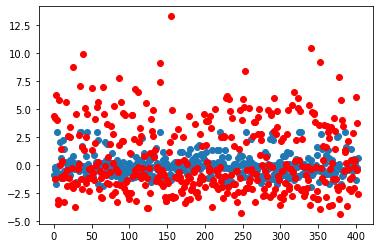

In [444]:
pred_y = x@wt
plt.scatter(range(0,len(train_y)),train_y)
plt.scatter(range(0,len(pred_y)),pred_y, color = 'r')

### Predict the values on test data

In [445]:
x = np.empty((test_x.shape[0],test_x.shape[1]+1))
x.shape

(102, 14)

In [446]:
x[:,0] = 1
x[:,1:] = test_x[:,:]
x

array([[ 1.        , -0.41843686,  3.80047346, ..., -1.54993904,
         0.39680182, -1.21873523],
       [ 1.        ,  0.92592393, -0.48724019, ...,  0.80577843,
         0.44061589,  1.82422974],
       [ 1.        , -0.36802848, -0.48724019, ..., -0.48755665,
         0.03862176, -0.6445909 ],
       ...,
       [ 1.        , -0.41572107,  2.94293073, ..., -2.70470251,
         0.38913436, -0.84484124],
       [ 1.        , -0.41354007,  1.22784527, ..., -0.39517558,
         0.44061589, -1.27755002],
       [ 1.        , -0.40934547,  0.79907391, ..., -0.85708096,
         0.29690573, -0.73981483]])

In [447]:
pred_y = x@wt
pred_y

array([-0.23730533,  4.67082116,  1.65968611, -2.11361269,  1.04728089,
       -2.60810529,  4.44787241,  2.21372501,  1.49257421, -2.1407234 ,
       -0.87606256, -0.68502617, -0.09617815, -0.50595386, -2.77200675,
       -3.44248719, -2.32805175,  2.69923973, -1.14854728, -1.30420531,
       -1.70881154,  5.39836229, -2.08644701, -2.98881345,  0.36772163,
       -2.74595621, -0.45699843, -2.01839886,  4.04571463,  5.26254963,
        5.01447917, -1.36982406,  3.56035631,  3.75861305,  2.40721161,
        4.05973044,  3.00488876,  4.7470835 ,  0.79329065,  1.38847789,
        4.74713034,  3.65995087,  4.97077897, -2.67115227, -1.06832904,
        0.32485763, -2.93578215, -1.47295921, -3.00088488,  3.86462999,
        7.91809548, -1.91696369, -1.76648432,  2.14439875,  1.40186706,
       -3.26319943, -1.90900659, -2.31571493,  2.45368911,  5.13251376,
       -1.50706429, -2.15102857,  2.85695018, -1.06274108,  4.73747868,
       -1.78032828, -3.099592  , -4.02817543, -3.29741761,  4.67

In [448]:
error = np.sqrt(np.sum(np.square(pred_y - test_y))/len(test_y))
error

3.6527742433450987

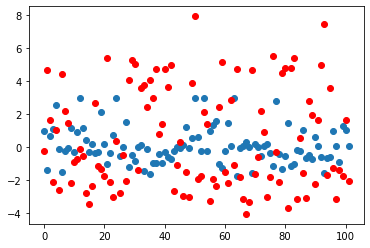

In [449]:
plt.scatter(range(0,len(test_y)),test_y)
plt.scatter(range(0,len(test_y)),pred_y, color = 'r')